<a href="https://colab.research.google.com/github/Anonsuksak/DADS6003ML/blob/main/Logistic_Regression_6610412009_Anon_Suksak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## แนะนำการวิเคราะห์หุ้นด้วย yahoo finance
- https://www.ultimatepython.co/post/python-yahoo-finance

In [ ]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

/var/folders/kn/8gjhms0n1pngh9vl05r8zqg80000gn/T/ipykernel_37742/2721483381.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## ให้นักศึกษาทำตาม link (ด้านล่าง) จนได้ผลลัพธ์ของภาพกราฟตามที่แสดงใน link

## https://blog.quantinsti.com/machine-learning-logistic-regression-python/

## a. โดย น.ศ. สามารถเลือกหุ้น (ทั่วโลก) ได้ตามใจชอบมา 1 หุ้น และจะใช้ data ย้อนหลังกี่วันก็ได้ แต่ time frame (window) ต้องเป็น 1 ชั่วโมงเหมือนกันทุกคน (ตามที่กำหนดไว้ใน starter kit link ข้างบน) แล้วแสดงผลลัพธ์ของกราฟ

- หุ้น Berkshire Hathaway Inc. ของ Warrent buffett ตัวย่อ BRK-B ตลาดหุ้น NYSE - NYSE Delayed Price. Currency in USD

## Step 1: Import Data

In [ ]:
BH = yf.Ticker('BRK-B')

In [ ]:
##ดึงข้อมูลได้แค่ 730 วัน กรณีดึงข้อมูลเป็นรายชั่วโมง

interval = '1h'

start = '2023-1-1'
end = '2023-12-31'

BH_price_df = BH.history(interval='1h',start=start,end=end)

In [ ]:
BH_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,309.899994,312.385010,308.899994,310.279999,852803,0.0,0.0
2023-01-03 10:30:00-05:00,310.359985,311.219910,308.570007,309.111603,309200,0.0,0.0
2023-01-03 11:30:00-05:00,309.170013,309.170013,307.920898,308.220001,253184,0.0,0.0
2023-01-03 12:30:00-05:00,308.200012,309.154999,307.490997,308.010010,230807,0.0,0.0
2023-01-03 13:30:00-05:00,307.989990,308.700012,307.380005,308.195007,208427,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,356.700012,356.989990,355.510010,355.670013,212870,0.0,0.0
2023-12-29 12:30:00-05:00,355.713989,356.059906,355.309998,355.489990,261654,0.0,0.0
2023-12-29 13:30:00-05:00,355.463501,356.079987,355.429993,355.820007,299533,0.0,0.0


In [ ]:
df = BH_price_df.copy()

In [ ]:
df = df.iloc[:, :4]
df.head()

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,309.899994,312.385010,308.899994,310.279999
2023-01-03 10:30:00-05:00,310.359985,311.219910,308.570007,309.111603
2023-01-03 11:30:00-05:00,309.170013,309.170013,307.920898,308.220001
2023-01-03 12:30:00-05:00,308.200012,309.154999,307.490997,308.010010
2023-01-03 13:30:00-05:00,307.989990,308.700012,307.380005,308.195007


## Step 2: Define Predictor/Independent Variables
- We will use 10-days moving average, correlation, relative strength index (RSI), the difference between the open price of yesterday and today, the difference between the close price of yesterday and the open price of today. Also, open, high, low, and close prices will be used as indicators to make the prediction.

## วิธีแก้ไขกรณี ติดตั้ง Ta-lib ไม่ได้
- https://blog.quantinsti.com/install-ta-lib-python/#install-ta-lib-on-macos
- https://blog.quantinsti.com/install-ta-lib-python/

In [ ]:
pip install TA-lib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import talib as ta

In [ ]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,312.640015,314.089996,312.630005,312.790009,313.374777,-0.798585,54.840032,-0.082794,0.870026
2023-01-05 14:30:00-05:00,312.790009,313.589996,311.820007,312.059998,313.053278,-0.791204,50.897870,0.000000,0.149994
2023-01-05 15:30:00-05:00,311.959991,312.989990,311.679993,312.769989,312.703278,-0.617879,54.437256,-0.100006,-0.830017
2023-01-06 09:30:00-05:00,315.000000,316.920013,313.380005,316.239990,312.959277,-0.533623,67.254892,2.230011,3.040009
2023-01-06 10:30:00-05:00,316.339996,318.779999,316.320007,317.765015,313.273779,-0.185809,71.209888,0.100006,1.339996
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,356.700012,356.989990,355.510010,355.670013,357.542001,-0.365859,33.787111,-0.029999,-1.159973
2023-12-29 12:30:00-05:00,355.713989,356.059906,355.309998,355.489990,357.341000,-0.389754,32.483064,0.043976,-0.986023
2023-12-29 13:30:00-05:00,355.463501,356.079987,355.429993,355.820007,357.165002,-0.316165,37.404070,-0.026489,-0.250488


## Step 3: Define Target/Dependent Variable
- The dependent variable is the same as discussed in the above example. If tomorrow’s closing price is higher than today’s closing price, then we will buy the stock (1), else we will sell it (-1).

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
df['Close'] ##ต้องการดูราคาปิดของแต่ละชั่วโมงในแต่ละวัน

Datetime
2023-01-05 13:30:00-05:00    312.790009
2023-01-05 14:30:00-05:00    312.059998
2023-01-05 15:30:00-05:00    312.769989
2023-01-06 09:30:00-05:00    316.239990
2023-01-06 10:30:00-05:00    317.765015
                                ...    
2023-12-29 11:30:00-05:00    355.670013
2023-12-29 12:30:00-05:00    355.489990
2023-12-29 13:30:00-05:00    355.820007
2023-12-29 14:30:00-05:00    357.095001
2023-12-29 15:30:00-05:00    356.929993
Name: Close, Length: 1724, dtype: float64

In [ ]:
df['Close'].shift(-1) ##ต้องการดูราคาปิดของชั่วโมงหลังจากช่วงเวลาที่สนใจ

Datetime
2023-01-05 13:30:00-05:00    312.059998
2023-01-05 14:30:00-05:00    312.769989
2023-01-05 15:30:00-05:00    316.239990
2023-01-06 09:30:00-05:00    317.765015
2023-01-06 10:30:00-05:00    316.730011
                                ...    
2023-12-29 11:30:00-05:00    355.489990
2023-12-29 12:30:00-05:00    355.820007
2023-12-29 13:30:00-05:00    357.095001
2023-12-29 14:30:00-05:00    356.929993
2023-12-29 15:30:00-05:00           NaN
Name: Close, Length: 1724, dtype: float64

In [ ]:
df['Close'].shift(1) ##ต้องการดูราคาปิดของชั่วโมงก่อนหน้า

Datetime
2023-01-05 13:30:00-05:00           NaN
2023-01-05 14:30:00-05:00    312.790009
2023-01-05 15:30:00-05:00    312.059998
2023-01-06 09:30:00-05:00    312.769989
2023-01-06 10:30:00-05:00    316.239990
                                ...    
2023-12-29 11:30:00-05:00    356.730011
2023-12-29 12:30:00-05:00    355.670013
2023-12-29 13:30:00-05:00    355.489990
2023-12-29 14:30:00-05:00    355.820007
2023-12-29 15:30:00-05:00    357.095001
Name: Close, Length: 1724, dtype: float64

## Step 4: Split The Dataset
- We will split the dataset into a training dataset and test dataset. We will use 70% of our data to train and the rest 30% to test. To do this, we will create a split variable which will divide the data frame in a 70-30 ratio. ‘Xtrain’ and ‘Ytrain’ are train dataset. ‘Xtest’ and ‘Ytest’ are the test dataset.

In [ ]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

## Step 5: Instantiate The Logistic Regression in Python
- We will instantiate the logistic regression in Python using ‘LogisticRegression’ function and fit the model on the training dataset using ‘fit’ function.

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [ ]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

/Users/anonsuksak/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 6: Examine The Coefficients

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.1567109534764581]
1,High,[-0.2652155534821792]
2,Low,[-0.02662930836757464]
3,Close,[0.18083509295189887]
4,S_10,[-0.04422566405890327]
5,Corr,[-0.11739698810491368]
6,RSI,[-0.004126019390934739]
7,Open-Close,[-0.08518495245702082]
8,Open-Open,[-0.0910717706791802]


## Step 7: Calculate Class Probabilities
- We will calculate the probabilities of the class for the test dataset using ‘predict_proba’ function.

In [ ]:
# Specify the date for prediction
prediction_date = '2024-12-31'
probability = model.predict_proba(X_test)
probability

array([[0.46235838, 0.53764162],
       [0.41132554, 0.58867446],
       [0.43240728, 0.56759272],
       ...,
       [0.42355495, 0.57644505],
       [0.45635821, 0.54364179],
       [0.45361905, 0.54638095]])

## Step 8: Predict Class Labels
- Next, we will predict the class labels using predict function for the test dataset.
- In the output above, the signal shows 1, which is a buy signal
- -1 is a sell signal

In [ ]:
predicted = model.predict(X_test)
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1

## for which dates did it predict 1?

In [ ]:
# Convert the predicted values array into a pandas Series with original row indices
predicted_df = pd.DataFrame({'Predicted': predicted}, index=X_test.index)
filtered_df = predicted_df[predicted_df['Predicted'] == 1]

# Display the filtered DataFrame
print(filtered_df)

                           Predicted
Datetime                            
2023-09-14 12:30:00-04:00          1
2023-09-14 13:30:00-04:00          1
2023-09-14 14:30:00-04:00          1
2023-09-14 15:30:00-04:00          1
2023-09-15 09:30:00-04:00          1
...                              ...
2023-12-29 11:30:00-05:00          1
2023-12-29 12:30:00-05:00          1
2023-12-29 13:30:00-05:00          1
2023-12-29 14:30:00-05:00          1
2023-12-29 15:30:00-05:00          1

[447 rows x 1 columns]


## Step 9: Evaluate The Model
## 9.1 Confusion Matrix
- The Confusion matrix is used to describe the performance of the classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 38 206]
 [ 33 241]]


## 9.2 Classification Report
- This is another method to examine the performance of the classification model.

In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.54      0.16      0.24       244
           1       0.54      0.88      0.67       274

    accuracy                           0.54       518
   macro avg       0.54      0.52      0.45       518
weighted avg       0.54      0.54      0.47       518



- The f1-score tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall. The support is the number of samples of the true response that lies in that class.
- The accuracy of the model is at 0.54 or 54%.

## 9.3 Model Accuracy

- We will calculate the model accuracy on the test dataset using ‘score’ function.

In [ ]:
print(model.score(X_test,y_test))

0.5386100386100386


## 9.4 Cross-Validation

- We will cross-check the accuracy of the model using 10-fold cross-validation. For this, we will use ‘crossvalscore’ function which we have imported from ‘sklearn.cross_validation’ library.

In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

/Users/anonsuksak/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anonsuksak/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[0.52023121 0.46242775 0.59537572 0.56647399 0.51162791 0.55232558
 0.51162791 0.5        0.52906977 0.52906977]
0.5278229600752791


/Users/anonsuksak/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- The accuracy is still 52.78% which means the model is working fine.

## Step 10: Create Trading Strategy Using The Model

- We will predict the signal to buy (1) or sell (-1) and calculate the cumulative Berkshire_Hathaway returns for the test dataset. Next, we will calculate the cumulative strategy return based on the signal predicted by the model in the test dataset. We will also plot the cumulative returns.

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Plotting graphs
import matplotlib.pyplot as plt

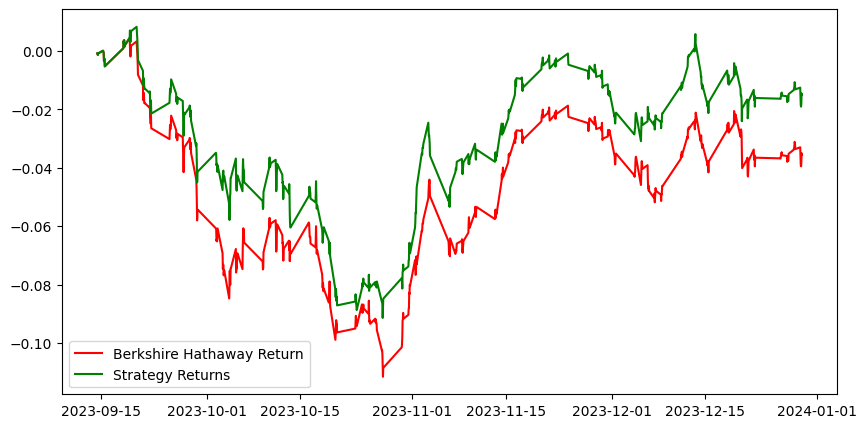

In [ ]:
df['Predicted_Signal'] = model.predict(X)
df['Berkshire_Hathaway_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Berkshire_Hathaway_returns = np.cumsum(df[split:]['Berkshire_Hathaway_returns'])

df['Startegy_returns'] = df['Berkshire_Hathaway_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Berkshire_Hathaway_returns, color='r',label = 'Berkshire Hathaway Return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

## b. เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

## Step 1: ต้องการทราบว่า ราคาปิดของหุ้นบริษัท Apple จะส่งต่อผลต่อผลตอบแทนและกระทบหุ้น Berkshire_Hathaway หรือไม่ โดยกำหนดช่วงเวลาเดียวกัน
- เนื่องจากบริษัท Berkshine ลงทุนในหุ้น Apple คิดเป็นมากกว่า 50% ของการลงทุนทั้งหมดของตนเอง

In [ ]:
Apple = yf.Ticker('AAPL')

##ดึงข้อมูลได้แค่ 730 วัน กรณีดึงข้อมูลเป็นรายชั่วโมง

interval = '1h'

start = '2023-1-1'
end = '2023-12-31'

Apple_price_df = Apple.history(interval='1h',start=start,end=end)

df2 = Apple_price_df["Close"]
df2 = pd.DataFrame(df2)
df2

,Close
Datetime,
2023-01-03 09:30:00-05:00,125.459999
2023-01-03 10:30:00-05:00,125.345001
2023-01-03 11:30:00-05:00,124.660004
2023-01-03 12:30:00-05:00,124.649902
2023-01-03 13:30:00-05:00,124.570000
...,...
2023-12-29 11:30:00-05:00,191.899994
2023-12-29 12:30:00-05:00,191.899994
2023-12-29 13:30:00-05:00,192.119995


## Step 2: เอา df2 ที่เป็นตัวแปรราคาปิดของหุ้นบริษัท Apple (Close_y)ไป merge กับ df1 ที่เป็นข้อมูลหุ้นของ Berkshire_Hathaway

In [ ]:
merged_df = pd.merge(df.iloc[:,:9], df2,on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Close_y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,312.640015,314.089996,312.630005,312.790009,313.374777,-0.798585,54.840032,-0.082794,0.870026,125.888702
2023-01-05 14:30:00-05:00,312.790009,313.589996,311.820007,312.059998,313.053278,-0.791204,50.897870,0.000000,0.149994,125.160004
2023-01-05 15:30:00-05:00,311.959991,312.989990,311.679993,312.769989,312.703278,-0.617879,54.437256,-0.100006,-0.830017,125.019997
2023-01-06 09:30:00-05:00,315.000000,316.920013,313.380005,316.239990,312.959277,-0.533623,67.254892,2.230011,3.040009,126.375000
2023-01-06 10:30:00-05:00,316.339996,318.779999,316.320007,317.765015,313.273779,-0.185809,71.209888,0.100006,1.339996,127.245003


## Step 3: สร้างตัวแปร X, Y สำหรับวิชาข้อ b

In [ ]:
merged_df.rename(columns={'Close_x': 'Close_BH'}, inplace=True)
merged_df.rename(columns={'Close_y': 'Close_APPL'}, inplace=True)

Xb = merged_df.iloc[:,:10]

Xb.head()

,Open,High,Low,Close_BH,S_10,Corr,RSI,Open-Close,Open-Open,Close_APPL
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,312.640015,314.089996,312.630005,312.790009,313.374777,-0.798585,54.840032,-0.082794,0.870026,125.888702
2023-01-05 14:30:00-05:00,312.790009,313.589996,311.820007,312.059998,313.053278,-0.791204,50.897870,0.000000,0.149994,125.160004
2023-01-05 15:30:00-05:00,311.959991,312.989990,311.679993,312.769989,312.703278,-0.617879,54.437256,-0.100006,-0.830017,125.019997
2023-01-06 09:30:00-05:00,315.000000,316.920013,313.380005,316.239990,312.959277,-0.533623,67.254892,2.230011,3.040009,126.375000
2023-01-06 10:30:00-05:00,316.339996,318.779999,316.320007,317.765015,313.273779,-0.185809,71.209888,0.100006,1.339996,127.245003


In [ ]:
yb = np.where(merged_df['Close_BH'].shift(-1) > merged_df['Close_BH'],1,-1)
yb

array([-1,  1,  1, ...,  1, -1, -1])

## Step 4: แบ่งข้อมูลสำหรับ Train 70% และ test  30%

In [ ]:
splitb = int(0.7*len(df))
Xb_train, Xb_test, yb_train, yb_test = Xb[:split], Xb[split:], yb[:split], yb[split:]

## Step 5: Logistic Regression

In [ ]:
modelb = LogisticRegression()
modelb = modelb.fit(Xb_train,yb_train)

/Users/anonsuksak/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pd.DataFrame(zip(Xb.columns, np.transpose(modelb.coef_)))

,0,1
0,Open,[0.16349173493861366]
1,High,[-0.2582389594735156]
2,Low,[-0.04615698697968011]
3,Close_BH,[0.1861308249609765]
4,S_10,[-0.04607432368815111]
5,Corr,[-0.11640547268658337]
6,RSI,[-0.004229516911407717]
7,Open-Close,[-0.09216345839220492]
8,Open-Open,[-0.09711594465035463]
9,Close_APPL,[0.004300761186911805]


## Step 6: Prediction

In [ ]:
# Specify the date for prediction
predictionb_date = '2024-12-22'
probabilityb = modelb.predict_proba(Xb_test)
probabilityb

array([[0.4836284 , 0.5163716 ],
       [0.43007689, 0.56992311],
       [0.45118   , 0.54882   ],
       ...,
       [0.41797559, 0.58202441],
       [0.44895446, 0.55104554],
       [0.44922178, 0.55077822]])

In [ ]:
predictedb = modelb.predict(Xb_test)
predictedb

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1

In [ ]:
# Convert the predicted values array into a pandas Series with original row indices
predicted_dfb = pd.DataFrame({'Predictedb': predictedb}, index=Xb_test.index)
filtered_dfb = predicted_dfb[predicted_dfb['Predictedb'] == 1]

# Display the filtered DataFrame
print(filtered_dfb)

                           Predictedb
Datetime                             
2023-09-14 12:30:00-04:00           1
2023-09-14 13:30:00-04:00           1
2023-09-14 14:30:00-04:00           1
2023-09-14 15:30:00-04:00           1
2023-09-15 09:30:00-04:00           1
...                               ...
2023-12-29 11:30:00-05:00           1
2023-12-29 12:30:00-05:00           1
2023-12-29 13:30:00-05:00           1
2023-12-29 14:30:00-05:00           1
2023-12-29 15:30:00-05:00           1

[445 rows x 1 columns]


## Step 7: Evaluate The Model

## 7.1 Confusion Matrix

In [ ]:
print(metrics.confusion_matrix(yb_test, predictedb))

[[ 38 206]
 [ 35 239]]


## 7.2 Classification Report

In [ ]:
print(metrics.classification_report(yb_test, predictedb))

              precision    recall  f1-score   support

          -1       0.52      0.16      0.24       244
           1       0.54      0.87      0.66       274

    accuracy                           0.53       518
   macro avg       0.53      0.51      0.45       518
weighted avg       0.53      0.53      0.46       518



- Accuracy is 53%

## Step 8: Create Trading Strategy Using The Model

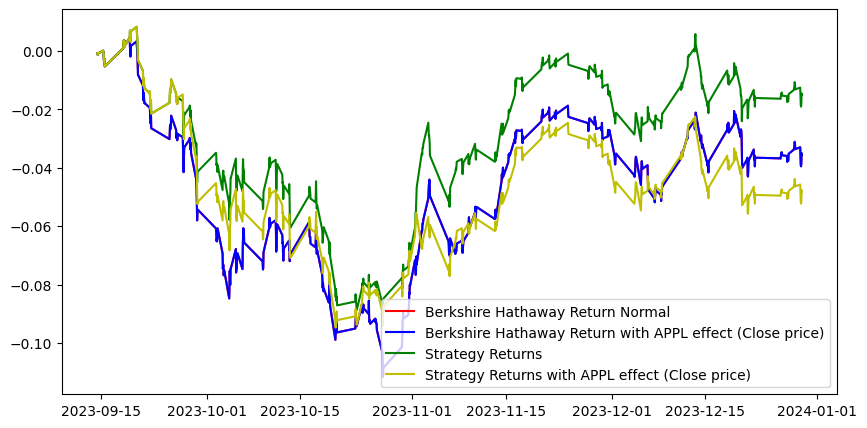

In [ ]:
plt.figure(figsize=(10,5))

##เส้นที่ 1 ผลตอบแทนจริงของ BH กรณีปกติ
plt.plot(Cumulative_Berkshire_Hathaway_returns, color='r',label = 'Berkshire Hathaway Return Normal')


##เส้นที่ 2 ผลตอบแทนจริงของ BH กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม/
merged_df['Predicted_Signalb'] = modelb.predict(Xb)
merged_df['BH_APPL'] = np.log(merged_df['Close_BH']/merged_df['Close_BH'].shift(1))
Cumulative_BH_AAPL_returns = np.cumsum(merged_df[splitb:]['BH_APPL'])
plt.plot(Cumulative_BH_AAPL_returns, color='b',label = 'Berkshire Hathaway Return with APPL effect (Close price)')

##เส้นที่ 3 ผลตอบแทนของตาม model กรณีปกติ
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')


##เส้นที่ 4 ผลตอบแทนของตาม model กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม
merged_df['Strategy_returnsb'] = merged_df['BH_APPL']* merged_df['Predicted_Signalb'].shift(1)
Cumulative_Strategy_returnsb = np.cumsum(merged_df[splitb:]['Strategy_returnsb'])
plt.plot(Cumulative_Strategy_returnsb, color='y', label = 'Strategy Returns with APPL effect (Close price)')


plt.legend()
plt.show()

- จากกราฟ พบว่า เส้นผลตอบแทนของหุ้น Berkshire กรณีปกติ (Berkshire Hathaway Return Normal) จะใกล้เคียงกับเส้นผลตอบแทนของหุ้น Berkshire กรณีที่นำราคาปิดของหุ้น Apple (APPL) มาวิเคราะห์ร่วมด้วย (Berkshire Hathaway Return with APPL effect (Close price)) อาจเป็นผลมาจากบริษัท Berkshire ได้ลงทุนในหุ้น Apple คิดเป็นมากกว่า 50% ของการลงทุนทั้งหมดของตนเอง
- นอกจากนี้ยังพบว่า logistic Model สามารถพยากรณ์ผลตอบแทนของการลงทุนในหุ้น Berkshire ได้สองรูปแบบคือ
- 1. กราฟเส้นสีเขียว กรณีปกติ ไม่นำผลของราคาปิดของหุ้น Apple (APPL) มาวิเคราะห์ พบว่า Model สามารถพยากรณ์การลงทุนซื้อขาย และสร้างผลตอบแทนได้กว่าผลตอบแทนของหุ้น Berkshire ที่เกิดขึ้นจริง
  2. กราฟเส้นสีเหลือง กรณีวิเคราะห์ราคาปิดของหุ้น Apple (APPL)ร่วมด้วย พบว่า Model สามารถพยากรณ์การลงทุนซื้อขาย และสร้างผลตอบแทนได้กว่าผลตอบแทนของหุ้น Berkshire ที่เกิดขึ้นจริงบ้าง ก่อนช่วงวันที่ 01-11-2023 และหลังจากนั้นก็ทำนายการซื้อขายและสร้างผลตอบแทนได้ต่ำกว่าผลตอบแทนจริง
- โดยสรุปกรณีที่ 2 เป็น model ที่สร้างผลตอบแทนได้ต่ำกว่ากรณีแรก